In [104]:
import pandas as pd
import matplotlib.pyplot as plt

import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # 폰트 설정
plt.rc('font', family='NanumBarunGothic')

In [105]:
df = pd.read_csv("/data/ephemeral/home/workspace/mlops-project-mlops-2/1.Data/맥주_cbf_data.csv")
print(df.head(2))
print(df.info())
print(df.describe())

   Unnamed: 0.2  Unnamed: 0  Unnamed: 0.1                    맥주이름  \
0             0           0             0  Kloud Original Gravity   
1             1           1             2         Asahi Super Dry   

                                  맥주스타일 Main Category  \
0  Pale Lager - International / Premium            라거   
1  Pale Lager - International / Premium            라거   

                                         Aroma  \
0  ['고소한 맥아향', '강한 향', '빵 향', '달콤한 향', '풀잎 향']   
1           ['고소한 맥아향', '강한 향', '쌀 향', '풀잎 향']   

                                        Flavor  Balance     Season  \
0                      ['쓴 맛', '상쾌함', '생강 힌트']  ['미디엄']  ['연중 내내']   
1  ['쓴 맛', '상쾌함', '쌀 풍미', '약간의 단맛', '약간의 쓴 맛']  ['미디엄']  ['연중 내내']   

               Paring Food                               Body      평점평균  평가횟수  
0  ['생선 요리', '해산물', '샐러드']        ['드라이', '깔끔함', '가벼움', '탄산']  2.301010    99  
1  ['생선 요리', '해산물', '샐러드']  ['드라이', '깔끔함', '가벼움', '약간의 매끄러움']  2.192882  1981  
<class 'pandas.cor

In [106]:
df.isnull().sum()  

Unnamed: 0.2     0
Unnamed: 0       0
Unnamed: 0.1     0
맥주이름             0
맥주스타일            0
Main Category    0
Aroma            0
Flavor           0
Balance          0
Season           0
Paring Food      0
Body             0
평점평균             0
평가횟수             0
dtype: int64

In [107]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


In [108]:
df = df.drop(columns=['Unnamed: 0.2'])
df.head()

,맥주이름,맥주스타일,Main Category,Aroma,Flavor,Balance,Season,Paring Food,Body,평점평균,평가횟수
0,Kloud Original Gravity,Pale Lager - International / Premium,라거,"['고소한 맥아향', '강한 향', '빵 향', '달콤한 향', '풀잎 향']","['쓴 맛', '상쾌함', '생강 힌트']",['미디엄'],['연중 내내'],"['생선 요리', '해산물', '샐러드']","['드라이', '깔끔함', '가벼움', '탄산']",2.301010,99
1,Asahi Super Dry,Pale Lager - International / Premium,라거,"['고소한 맥아향', '강한 향', '쌀 향', '풀잎 향']","['쓴 맛', '상쾌함', '쌀 풍미', '약간의 단맛', '약간의 쓴 맛']",['미디엄'],['연중 내내'],"['생선 요리', '해산물', '샐러드']","['드라이', '깔끔함', '가벼움', '약간의 매끄러움']",2.192882,1981
2,Tsingtao,Pale Lager - International / Premium,라거,"['고소한 맥아향', '강한 향', '희미한 옥수수향']","['쓴 맛', '상쾌함', '가벼운 맥아 풍미', '옥수수 풍미', '약간의 쓴맛']",['미디엄'],['연중 내내'],"['생선 요리', '해산물', '샐러드', '매운 음식']","['드라이', '깔끔함', '가벼움', '가벼운 탄산']",2.058092,2212
3,Heineken,Pale Lager - International / Premium,라거,"['고소한 맥아향', '강한 향', '가벼운 스컹스 향', '풀잎 향']","['쓴 맛', '상쾌함', '스컹크 풍미']",['미디엄'],['연중 내내'],"['생선 요리', '해산물', '샐러드']","['드라이', '깔끔함', '탄산']",2.159061,4133
4,Kirin Ichiban,Pale Lager - International / Premium,라거,"['고소한 맥아향', '강한 향', '가벼운 낱알 몰트 향']","['쓴 맛', '상쾌함', '맥아 풍미']",['미디엄'],['연중 내내'],"['생선 요리', '해산물', '샐러드']","['드라이', '깔끔함', '적당한 탄산']",2.224910,1943


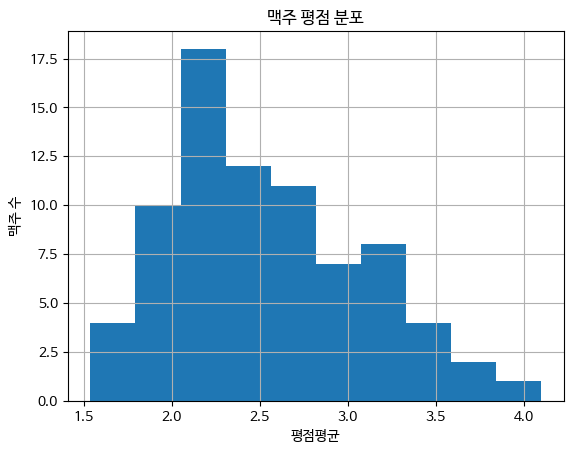

In [109]:
df['평점평균'].hist(bins=10)
plt.xlabel('평점평균')
plt.ylabel('맥주 수')
plt.title('맥주 평점 분포')
plt.show()

# CBF : 맥주 특성에 따른 유사도

In [110]:
# 리스트 형태의 문자열 컬럼 찾기
import ast

list_style_cols = []

for col in df.columns:
    sample_val = df[col].dropna().iloc[0]

    if isinstance(sample_val, str) and sample_val.startswith('[') and sample_val.endswith(']'):
        try:
            transform_val = ast.literal_eval(sample_val)    
            if isinstance(transform_val, list):
                list_style_cols.append(col)

        except (ValueError, SyntaxError):
            print(f"{col}: failed to parse as list")
            continue


        except Exception as e:
            print(f"Error processing column {col}: {e}")    
            continue

print(list_style_cols)



['Aroma', 'Flavor', 'Balance', 'Season', 'Paring Food', 'Body']


In [111]:
df['Aroma'].apply(type).value_counts()

Aroma
<class 'str'>    77
Name: count, dtype: int64

In [112]:
import regex as re

def remove_double_quotes_inside_brackets(text):
    if not isinstance(text, str):
        return text
    
    # 대괄호 안쪽 전체 잡기
    def replacer(match):
        inside = match.group(1)
        # 안쪽에서 "" 제거
        return "[" + inside.replace('""', '') + "]"
    
    return re.sub(r"\[(.*?)\]", replacer, text)

df["Aroma"] = df["Aroma"].apply(remove_double_quotes_inside_brackets)

In [113]:
# 문자열 → 리스트 변환
import ast

for col in list_style_cols:
    df[col] = df[col].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)


In [114]:
# for col in list_style_cols:
#     bad_rows = df[df[col].apply(lambda x: not isinstance(x, list))][col]
#     if len(bad_rows) > 0:
#         print(f"비정상 리스트 값 : {col}")
#         print(bad_rows.head())
#     else :
#         df[col] = df[col].apply(lambda x : ast.literal_eval(x) if isinstance(x, str) else x)

In [115]:
df['Aroma'].apply(type).value_counts()

Aroma
<class 'list'>    77
Name: count, dtype: int64

In [116]:
def normalize_list_columns(df: pd.DataFrame):

    list_cols = []

    for col in df.columns:
        sample_val = df[col].dropna().iloc[0] if not df[col].dropna().empty else None

        is_list_col = False
        if isinstance(sample_val, list):
            is_list_col = True
        elif isinstance(sample_val, tuple) and len(sample_val) == 1 and isinstance(sample_val[0], list):
            # ex.  ([청량함, 견과류 풍미, 스파이시, 쓴 맛])
            is_list_col = True
        elif isinstance(sample_val, str) and sample_val.startswith("[") and sample_val.endswith("]"):
            # ex.  ['쓴 맛', '상쾌함']
            try:
                parsed_val = ast.literal_eval(sample_val)
                if isinstance(parsed_val, list):
                    is_list_col = True
            except (ValueError, SyntaxError):
                pass

        if is_list_col:
            list_cols.append(col)

            def convert(val):
                if isinstance(val, list):
                    return val

                if isinstance(val, tuple) and len(val) == 1 and isinstance(val[0], list):
                    return val[0]
                
                if isinstance(val, str) :
                    try:
                        s = val.strip()
                        parsed = ast.literal_eval(s)
                        if isinstance(parsed, list):
                            return parsed
                    except (ValueError, SyntaxError):
                        return None
              
                if pd.isna(val):
                    return val    
                
                return None  # 그 외는 None 처리

            df[col] = df[col].apply(convert)

    return list_cols


In [117]:
list_style_cols = normalize_list_columns(df)

In [118]:
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd

mlb = MultiLabelBinarizer()
encoded_features = []

for col in list_style_cols:
    transformed = mlb.fit_transform(df[col])
    encoded_df = pd.DataFrame(
        transformed,
        columns=[f"{col}_{c}" for c in mlb.classes_],
        index=df.index  # 인덱스 맞추기
    )
    encoded_features.append(encoded_df)

# 인코딩된 컬럼들을 하나로 합치기
# encoded_df_all = pd.concat(encoded_features, axis=1)

# 원본 df와 합치기
# df_encoded = pd.concat([df.drop(columns=list_style_cols), encoded_df_all], axis=1)


In [119]:
# 4. 수치형 컬럼 스케일링
from sklearn.preprocessing import MinMaxScaler

num_cols = ['평점평균', '평가횟수']
scaler = MinMaxScaler()
scaled_num_df = pd.DataFrame(scaler.fit_transform(df[num_cols]), columns=num_cols)

In [120]:
# 5. 모든 feature 합치기
feature_df = pd.concat(encoded_features + [scaled_num_df], axis=1)

In [121]:
df_encoded = pd.concat([df[['맥주이름']], feature_df], axis=1)

In [122]:
df_encoded.head()
df_encoded.columns


Index(['맥주이름', 'Aroma_'깔끔한 맥아향', '사츠홉향','스파이시한 향','허브향'', 'Aroma_가벼운 곡물향',
       'Aroma_가벼운 낱알 몰트 향', 'Aroma_가벼운 스컹스 향', 'Aroma_가벼운 향', 'Aroma_강한 향',
       'Aroma_거친 맥아향', 'Aroma_고소한 맥아향', 'Aroma_고수',
       ...
       'Body_적당한 탄산화', 'Body_적은 탄산', 'Body_적절한 탄산화', 'Body_진한 맥아 풍미',
       'Body_청량함', 'Body_크리미', 'Body_탄산', 'Body_풍부한 탄산', '평점평균', '평가횟수'],
      dtype='object', length=311)

In [134]:
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

def recommend_beers(df_encoded, target_beer, top_n=5):
    feature_cols = [col for col in df_encoded.columns if col != '맥주이름']
    features = df_encoded[feature_cols]

    # 부분 검색
    matches = df_encoded[df_encoded['맥주이름'].str.contains(target_beer, case=False, na=False)].index[0]
    target_idx = matches
    if not matches:
        raise ValueError(f"'{target_beer}' not found in 맥주이름 column")

    # 코사인 유사도 계산
    similarity_matrix = cosine_similarity(features)
    sim_scores = list(enumerate(similarity_matrix[target_idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:top_n+1]

    recommended = [(df_encoded.iloc[i]['맥주이름'], score) for i, score in sim_scores]

    return pd.DataFrame(recommended, columns=["맥주이름", "similarity"])


# similarity_matrix : redis나 s3에 저장해두기??


In [135]:
recommendations = recommend_beers(df_encoded, target_beer="Guinness", top_n=5)

print(recommendations)

                     맥주이름  similarity
0  Guinness Original 4.2%    0.544176
1         Victoria Bitter    0.266704
2    Sapporo Premium Beer    0.233828
3               Budweiser    0.225692
4        Bavaria Pilsener    0.223273


In [50]:
recommendations = recommend_beers(df_encoded, target_beer="Heineken", top_n=5)

print(recommendations)

                          맥주이름  similarity
0         Sapporo Premium Beer    0.856204
1             Bavaria Pilsener    0.850753
2       Kloud Fitz Super Clear    0.842013
3        Peroni Nastro Azzurro    0.826350
4  Castlemaine XXXX Gold Lager    0.807827


# CF : 맥주 평점 데이터 기반 맥주-맥주 유사도 (Item-Based CF)

- A 맥주 평점이 높을 떄, B 맥주도 비슷하게 평점이 높은지 유사도 
- "맥주 간" 평점 패턴의 유사성을 계산 → 내가 좋아하는 맥주와 비슷한 맥주 추천

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

beer_list = set(df_encoded['맥주이름'])
rating_df = pd.read_csv("/data/ephemeral/home/workspace/mlops-project-mlops-2/1.Data/맥주.csv")

rating_df = rating_df[rating_df['맥주'].isin(beer_list)]

rating_matrix = rating_df.pivot_table(index="아이디", columns="맥주", values="평점")

item_similarity = cosine_similarity(rating_matrix.T.fillna(0))
item_similarity_df = pd.DataFrame(item_similarity,
                                  index=rating_matrix.columns,
                                  columns=rating_matrix.columns)



In [58]:
def recommend_similar_beers(beer_name, top_n=5):
    beer_name_lower = beer_name.lower()
    matches = [b for b in item_similarity_df.index if beer_name_lower in b.lower()]
    if not matches:
        raise ValueError(f"'{beer_name}'와(과) 일치하는 맥주를 찾을 수 없습니다.")
    
    matched_beer = matches[0]
    return item_similarity_df[matched_beer].sort_values(ascending=False)[1:top_n+1]

print(recommend_similar_beers("asahi", top_n=5))


맥주
Tsingtao                 0.461067
Kirin Ichiban            0.458047
Tiger Beer               0.457435
Peroni Nastro Azzurro    0.425022
Pilsner Urquell          0.421237
Name: Asahi Super Dry, dtype: float64


# CF : 맥주 평점 데이터 기반 유저-유저 유사도 (User-Based CF)

- 나와 평점 분포가 비슷한, 취향이 비슷한 유저들이 좋아하는 맥주 
- "유저 간" 평점 패턴의 유사성을 계산 → 나와 취향이 비슷한 유저들이 좋아하는 맥주를 추천




In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

beer_list = set(df_encoded['맥주이름'])
rating_df = pd.read_csv("/data/ephemeral/home/workspace/mlops-project-mlops-2/1.Data/맥주.csv")
rating_df = rating_df[rating_df['맥주'].isin(beer_list)]

rating_df['아이디'] = rating_df['아이디'].str.replace(r"\(.*\)","",regex=True)

rating_matrix = rating_df.pivot_table(index="아이디", columns="맥주", values="평점")


user_similarity = cosine_similarity(rating_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity,
                                  index=rating_matrix.index,
                                  columns=rating_matrix.index)




In [72]:
print(rating_matrix.loc["patjenner"].dropna())

맥주
Kloud Original Gravity    4.0
Name: patjenner, dtype: float64


In [ ]:

def recommend_for_user(user_id, top_n=5):
    if user_id not in user_similarity_df.index:
        raise ValueError(f"'{user_id}' 유저를 찾을 수 없습니다.")
    
    user_rated_count = rating_matrix.loc[user_id].count()
    if user_rated_count < 5:
        return f"{user_id} 님, 최소 5개 이상의 맥주를 평가한 후에 추천을 받을 수 있습니다."
    
    similar_users = user_similarity_df[user_id].sort_values(ascending=False)[1:top_n+1]
    
    similar_user_ratings = rating_matrix.loc[similar_users.index]
    mean_ratings = similar_user_ratings.mean(axis=0).dropna().sort_values(ascending=False)
    
    # already_rated = rating_matrix.loc[user_id].dropna().index
    # mean_ratings = mean_ratings[~mean_ratings.index.isin(already_rated)]

    return mean_ratings.head(top_n)


print(recommend_for_user("patjenner", top_n=5))

print("=============")

print(f"rja 님에게 드리는 추천 맥주",recommend_for_user("rja", top_n=5))

patjenner 님, 최소 5개 이상의 맥주를 평가한 후에 추천을 받을 수 있습니다.
rja 님에게 드리는 추천 맥주 맥주
Erdinger Weissbier Dunkel    3.575
Pilsner Urquell              3.540
Guinness Draught             3.200
Warsteiner Premium Verum     2.650
Asahi Super Dry              2.600
dtype: float64
